In [66]:
import gym
import numpy as np 
import matplotlib.pyplot as plt

In [67]:
# 1. Load Environment and Q-table structure
env = gym.make('FrozenLake-v0')
Q = np.zeros([env.observation_space.n,env.action_space.n])
# env.obeservation.n, env.action_space.n gives number of states and action in env loaded
#Q

In [68]:
# 2. Parameters of Q-leanring
eta = .8
gma = .9
epis = 15000
 # rewards per episode calculate

In [72]:
rev_list = []
delta_list = []
steps_over_iteration = []
score_over_iteration = []

for i in range(1,epis):
    # Reset environment
    s = env.reset()
    rAll = 0
    d = False
    j = 0
    #The Q-Table learning algorithm
    while j < 99:
        #env.render()
        j+=1
        # Choose action from Q table
        a = np.argmax(Q[s,:] + np.random.randn(1,env.action_space.n)*(1./(i+1)))
        #Get new state & reward from environment
        s1,r,d,_ = env.step(a)
        #Update Q-Table with new knowledge
        qtable_prev = np.copy(Q[s,a])
        Q[s,a] = Q[s,a] + eta*(r + gma*np.max(Q[s1,:]) - Q[s,a])
        rAll += r
        s = s1
        if d == True:
            break
    rev_list.append(rAll)
    delta = np.sum(np.fabs(Q[s,a] - qtable_prev))
    round_delta = round(delta, 0)
    delta_list.append(round_delta/i) 
    score_over_iteration.append(sum(rev_list)/i) ### make it look better???

    #env.render()
print ("Reward Sum on all episodes " + str(sum(rev_list)/epis))
print ("Final Values Q-Table")
#print (Q)


Reward Sum on all episodes 0.686
Final Values Q-Table


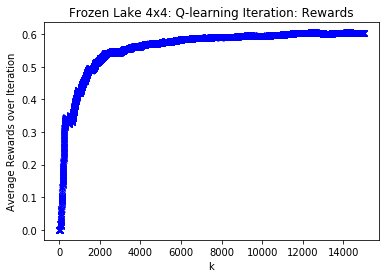

In [49]:
total_episodes = 15000
K = range(1,total_episodes)
plt.plot(K, score_over_iteration, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Rewards over Iteration')
plt.title('Frozen Lake 8x8: Q-learning Iteration: Rewards')
plt.show()

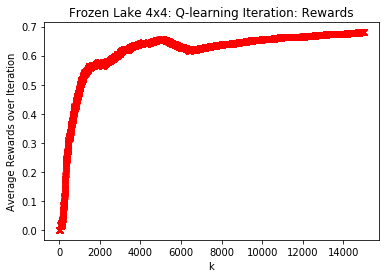

In [70]:
total_episodes = 15000
K = range(1,total_episodes)
plt.plot(K, score_over_iteration, 'rx-')
plt.xlabel('k')
plt.ylabel('Average Rewards over Iteration')
plt.title('Frozen Lake 4x4: Q-learning Iteration: Rewards')
plt.show()

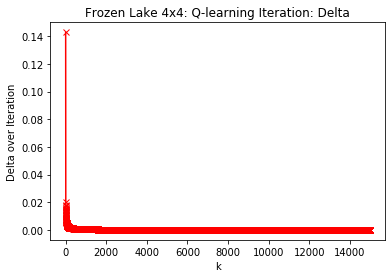

In [73]:
total_episodes = 15000
K = range(1,total_episodes)
delta_list.sort(reverse = True )
plt.plot(K, delta_list , 'rx-')
plt.xlabel('k')
plt.ylabel('Delta over Iteration')
plt.title('Frozen Lake 4x4: Q-learning Iteration: Delta')
plt.show()